In [3]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
def view_random_image(t_dir, t_class):
    t_folder = t_dir + t_class
    rand_img = random.sample(os.listdir(t_folder),1)
    print(rand_img)

    img = mpimg.imread(t_folder+'/'+rand_img[0])
    plt.imshow(img)
    plt.title(t_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}')

    return img


In [5]:
data_dir = pathlib.Path('../data/pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


['2230959.jpg']
Image shape: (512, 512, 3)


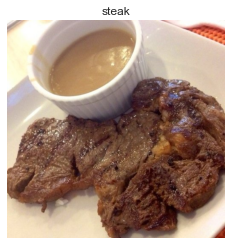

In [6]:
img = view_random_image(t_dir='../data/pizza_steak/train/', t_class="steak")

In [7]:
tf.constant(img)
img.shape

(512, 512, 3)

In [8]:
tf.random.set_seed(20)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '../data/pizza_steak/train'
test_dir = '../data/pizza_steak/test'


train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=20)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=20)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")])


In [14]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [15]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6304 - accuracy: 0.6340 - val_loss: 0.4169 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 19s 411ms/step - loss: 0.4490 - accuracy: 0.7860 - val_loss: 0.4357 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 20s 418ms/step - loss: 0.4397 - accuracy: 0.7987 - val_loss: 0.4774 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 20s 419ms/step - loss: 0.4094 - accuracy: 0.8127 - val_loss: 0.3663 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 20s 414ms/step - loss: 0.3856 - accuracy: 0.8367 - val_loss: 0.3764 - val_accuracy: 0.8600


In [17]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  